<a href="https://colab.research.google.com/github/globaljones/PandaHunt/blob/master/DWBICWK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [172]:
df_fact = pd.read_csv('/content/sample_data/Groceries_dataset1.csv')

In [173]:
conn = sqlite3.connect("RFMdb")
cur = conn.cursor() 


In [175]:
df_fact.to_sql("data11", conn)

38765

In [177]:
#Reading the csv file and check for correlation scores
data11=pd.read_csv('/content/sample_data/Groceries_dataset1.csv')
data11.corr()


<ipython-input-177-3972c5ceb4e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data11.corr()


,Member_number
Member_number,1.0


In [178]:
df_fact2 = pd.read_sql('SELECT * FROM data11', conn)
df_fact2


,index,Member_number,Date,itemDescription
0,0,1000,2015-05-27,soda
1,1,1000,2015-07-24,canned beer
2,2,1000,2015-03-15,sausage
3,3,1000,2015-11-25,sausage
4,4,1000,2015-03-15,whole milk
...,...,...,...,...
38760,38760,5000,2014-03-09,fruit/vegetable juice
38761,38761,5000,2015-02-10,root vegetables
38762,38762,5000,2014-11-16,other vegetables
38763,38763,5000,2014-03-09,onions


In [179]:
df_fact2.dtypes

index               int64
Member_number       int64
Date               object
itemDescription    object
dtype: object

In [181]:
df_fact2['Date'] = pd.to_datetime(df_fact2['Date'], format='%Y-%m-%d')

In [182]:
df_fact2.dtypes

index                       int64
Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [187]:
cleandata = pd.read_sql(''' SELECT *                
            FROM data11
            WHERE itemDescription IS NOT NULL
            AND Member_number IS NOT NULL    
            AND Date IS NOT NULL     
            ''', conn)


In [188]:
cleandata.to_sql("cleandata32", conn)

38765

In [194]:
df_fact22 = pd.read_sql('SELECT * FROM cleandata32', conn)
df_fact22

,level_0,index,Member_number,Date,itemDescription
0,0,0,1000,2015-05-27,soda
1,1,1,1000,2015-07-24,canned beer
2,2,2,1000,2015-03-15,sausage
3,3,3,1000,2015-11-25,sausage
4,4,4,1000,2015-03-15,whole milk
...,...,...,...,...,...
38760,38760,38760,5000,2014-03-09,fruit/vegetable juice
38761,38761,38761,5000,2015-02-10,root vegetables
38762,38762,38762,5000,2014-11-16,other vegetables
38763,38763,38763,5000,2014-03-09,onions


In [ ]:
df_fact22["last_order_date"] = df_Fact2["last_order_date"].dt.date

In [190]:
data_summary2 = pd.read_sql(''' SELECT 
    Member_number,
    Max(Date) as Most_Recent_Transaction_Date,
    COUNT(DISTINCT Date) as Transactions,
    COUNT(*) as Items_Purchased
  FROM
    cleandata32
  GROUP BY
    Member_number
    ''', conn)

In [191]:
data_summary2.to_sql("datasummary2", conn)
                    

3898

In [195]:
df_fact32 = pd.read_sql('SELECT Member_number, Most_Recent_Transaction_Date, Transactions, Items_Purchased FROM datasummary2', conn)
df_fact32

,Member_number,Most_Recent_Transaction_Date,Transactions,Items_Purchased
0,1000,2015-11-25,5,13
1,1001,2015-05-02,5,12
2,1002,2015-08-30,4,8
3,1003,2015-02-10,4,8
4,1004,2015-12-02,8,21
...,...,...,...,...
3893,4996,2015-11-24,3,10
3894,4997,2015-12-27,2,6
3895,4998,2015-10-14,1,2
3896,4999,2015-12-26,6,16


In [201]:
RFM12 = pd.read_sql( '''SELECT 
          Member_number AS Member_Number,   
          Most_Recent_Transaction_Date AS last_purchase,
          Transactions AS Frequency,
          Items_Purchased AS Monetary_Value 
        FROM 
          datasummary2 
        GROUP BY
          Member_Number
    ''', conn)

In [202]:
RFM12.to_sql("RFM12", conn)

3898

In [203]:
df_fact33 = pd.read_sql('SELECT Member_Number, last_purchase, Frequency, Monetary_Value FROM RFM12', conn)
df_fact33

,Member_Number,last_purchase,Frequency,Monetary_Value
0,1000,2015-11-25,5,13
1,1001,2015-05-02,5,12
2,1002,2015-08-30,4,8
3,1003,2015-02-10,4,8
4,1004,2015-12-02,8,21
...,...,...,...,...
3893,4996,2015-11-24,3,10
3894,4997,2015-12-27,2,6
3895,4998,2015-10-14,1,2
3896,4999,2015-12-26,6,16


In [205]:
RFM13 = pd.read_sql( '''SELECT 
        Member_Number, 
        (735 - julianday('2016-01-01') + julianday(last_purchase)) AS Recency,
        Frequency, 
        Monetary_Value
    FROM 
        RFM12
    GROUP BY
          Member_Number
    ''', conn)

In [206]:
RFM13.to_sql("RFM13", conn)

3898

In [207]:
df_fact34 = pd.read_sql('SELECT Member_Number, Recency, Frequency, Monetary_Value FROM RFM13', conn)
df_fact34

,Member_Number,Recency,Frequency,Monetary_Value
0,1000,698.0,5,13
1,1001,491.0,5,12
2,1002,611.0,4,8
3,1003,410.0,4,8
4,1004,705.0,8,21
...,...,...,...,...
3893,4996,697.0,3,10
3894,4997,730.0,2,6
3895,4998,656.0,1,2
3896,4999,729.0,6,16


Text(0.5, 1.0, 'Histogram of Recency Values')

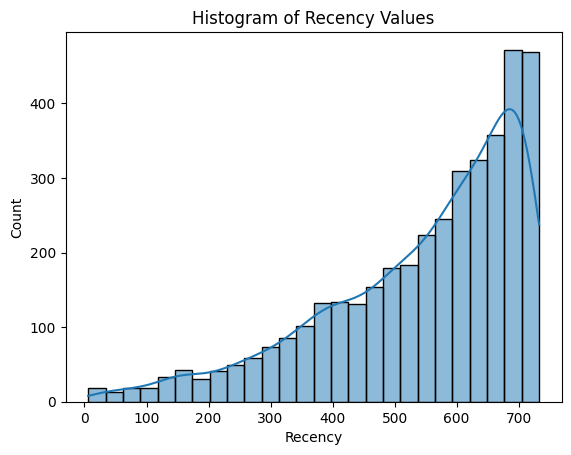

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM13, x='Recency', kde=True)
ax.set_title('Histogram of Recency Values')


Text(0.5, 1.0, 'Histogram of Frequency Values')

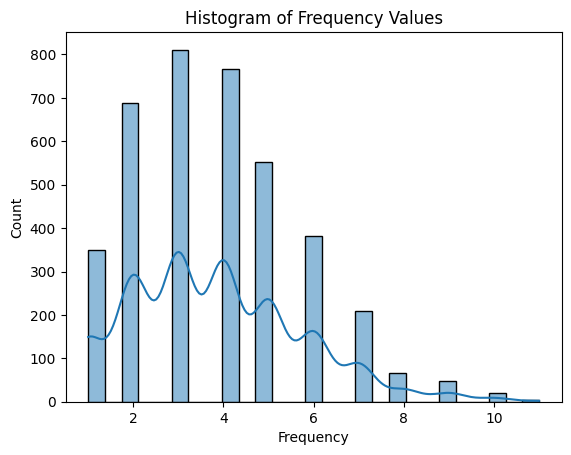

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM13, x='Frequency', kde=True)
ax.set_title('Histogram of Frequency Values')


Text(0.5, 1.0, 'Histogram of Frequency Values')

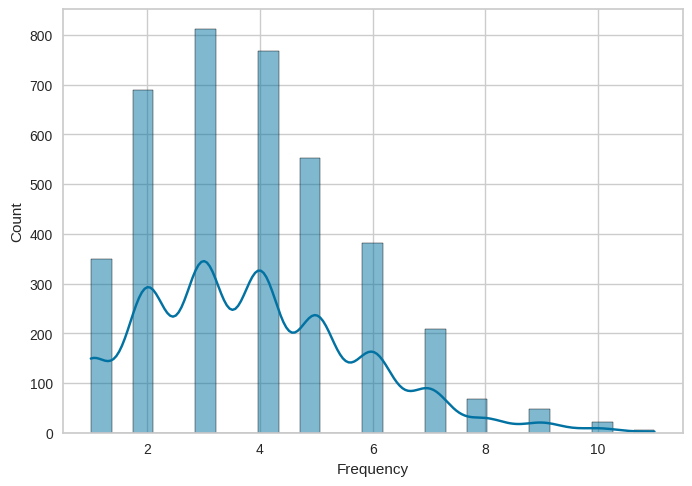

In [232]:
sns.histplot(data=RFM13, x='Frequency', kde=True)
ax.set_title('Histogram of Frequency Values')

Text(0.5, 1.0, 'Histogram of Monetary Values')

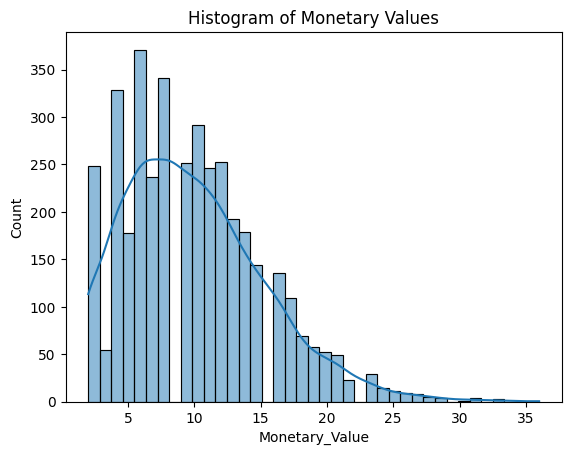

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM13, x='Monetary_Value', kde=True)
ax.set_title('Histogram of Monetary Values')


<ipython-input-233-f8c14a6ef954>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM13['Recency'])
<ipython-input-233-f8c14a6ef954>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM13['Frequency'])
<ipython-input-233-f8c14a6ef954>:8: UserWarning: 


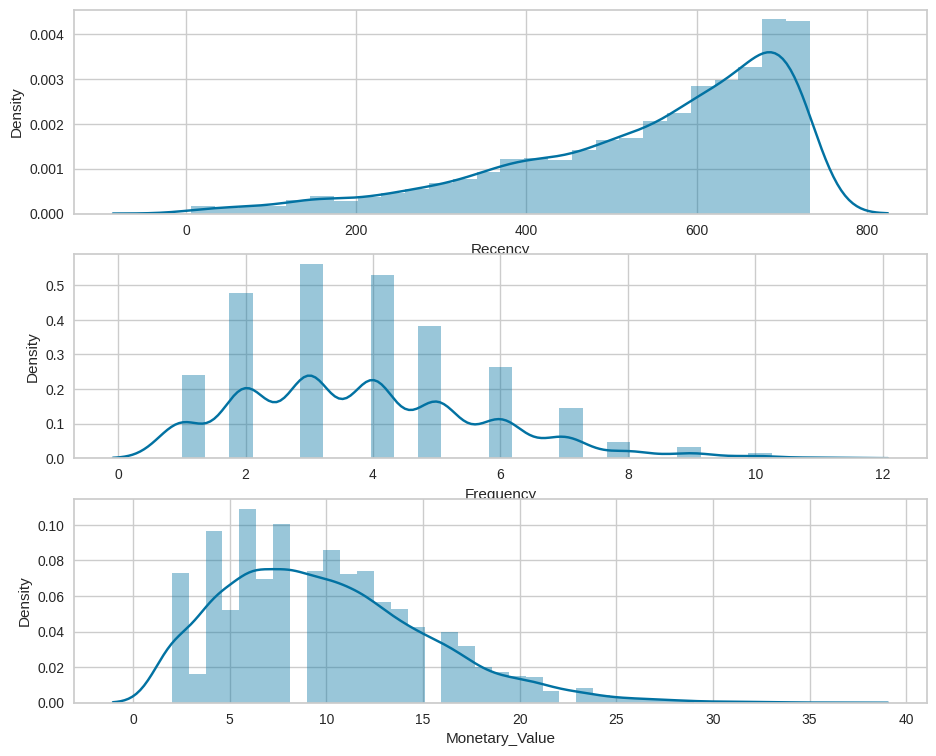

In [233]:
# Plot RFM distributions
plt.figure(figsize=(11,9))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM13['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM13['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM13['Monetary_Value'])
# Show the plot
plt.show()


In [234]:
from scipy import stats
RFMboxcox = pd.DataFrame()
RFMboxcox["Recency"] = stats.boxcox(RFM13['Recency'])[0]
RFMboxcox["Frequency"] = stats.boxcox(RFM13['Frequency'])[0]
RFMboxcox["MonetaryValue"] = stats.boxcox(RFM13['Monetary_Value'])[0]
RFMboxcox.tail()


,Recency,Frequency,MonetaryValue
3893,252706.324901,1.412097,3.847542
3894,277285.893024,0.810273,2.654617
3895,223761.769288,0.000000,0.802660
3896,276524.244898,2.725071,5.191431
3897,87138.305782,1.412097,2.988455


In [231]:
from scipy import stats
customers_fix1 = pd.DataFrame()
customers_fix1["Recency"] = stats.boxcox(customers_fix['Recency'])[0]
customers_fix1["Frequency"] = stats.boxcox(RFM13['Frequency'])[0]
customers_fix1["MonetaryValue"] = stats.boxcox(RFM13['Monetary_Value'])[0]
customers_fix1.tail()

KeyError: ignored

<ipython-input-235-0996beee3ef1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFMboxcox['Recency'])
<ipython-input-235-0996beee3ef1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFMboxcox['Frequency'])
<ipython-input-235-0996beee3ef1>:8: UserWa

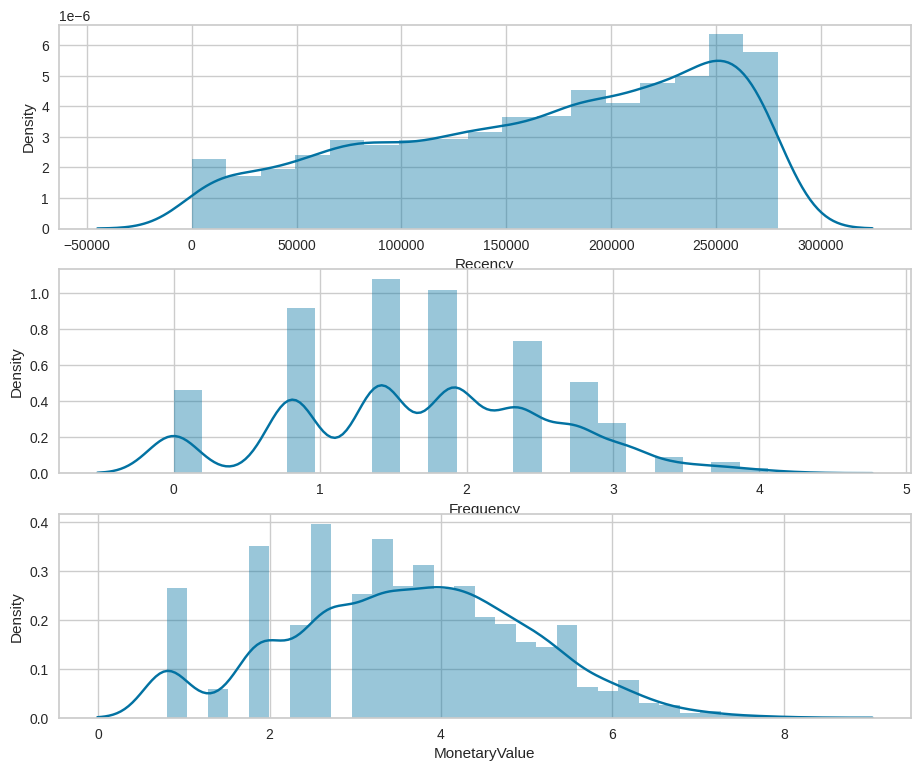

In [235]:
# Plot RFM distributions
plt.figure(figsize=(11,9))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFMboxcox['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFMboxcox['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFMboxcox['MonetaryValue'])
# Show the plot
plt.show()


In [241]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler1 = StandardScaler()
# Fit and Transform The Data
scaler1.fit(RFMboxcox)
RFM_normalised = scaler1.transform(RFMboxcox)
# Assert that it has mean 0 and variance 1
print(RFM_normalised.mean(axis = 0).round(2)) # [0. -0. 0.]
print(RFM_normalised.std(axis = 0).round(2)) # [1. 1. 1.]


[-0. -0. -0.]
[1. 1. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

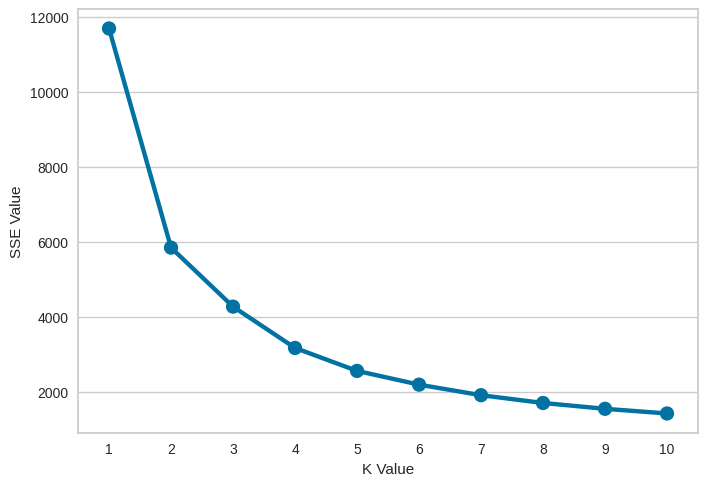

In [243]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(RFM_normalised)
    sse[k] = kmeans1.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('K Value')
plt.ylabel('SSE Value')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

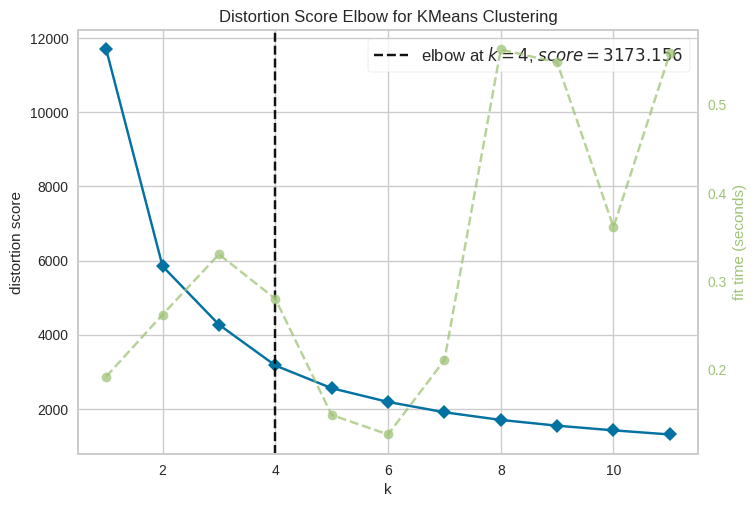

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [245]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model1 = KMeans()
visualiser1 = KElbowVisualizer(model1, k=(1,12))
visualiser1.fit(RFM_normalised)  
visualiser1.show()  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Member_Number,Recency,Frequency,Monetary_Value
Cluster,,,,
0,718,718,718,718
1,1122,1122,1122,1122
2,1180,1180,1180,1180
3,878,878,878,878


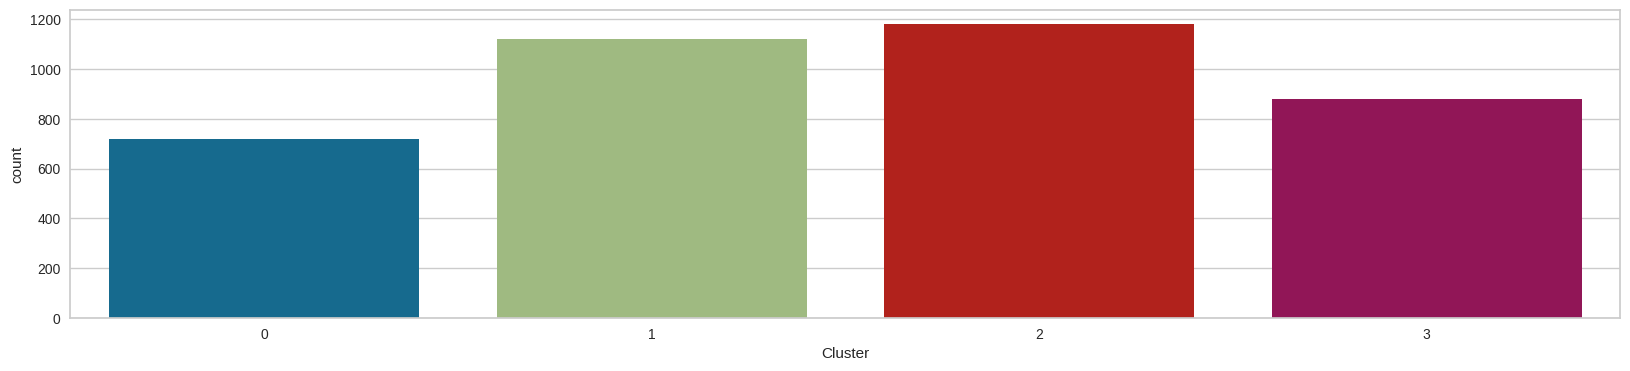

In [252]:
model2 = KMeans(n_clusters=4, random_state=42)
model2.fit(RFM_normalised)
model2.labels_.shape
RFM13["Cluster"] = model2.labels_
RFM13.groupby('Cluster').agg({
'Recency':'mean',
'Frequency':'mean',
'Monetary_Value':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.countplot(x="Cluster", data=RFM13)
RFM13.groupby(['Cluster']).count()


In [247]:
RFM13["Cluster"] = model2.labels_
RFM13.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary_Value':['mean', 'count']}).round(2)


Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0        352.59      1.56           3.75   718
1        652.75      3.03           7.85  1122
2        649.38      6.02          16.02  1180
3        425.69      3.79           9.53   878

<Axes: xlabel='Attribute (R/F/M)', ylabel='Value'>

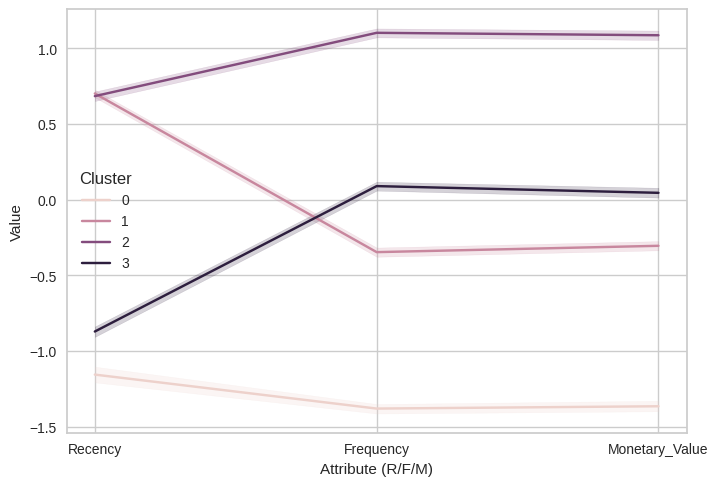

In [251]:
# Create the dataframe
df_normalised = pd.DataFrame(RFM_normalised, columns=['Recency', 'Frequency', 'Monetary_Value'])
df_normalised['ID'] = RFM13.index
df_normalised['Cluster'] = model2.labels_
# Melt The Data
df_norm_melted = pd.melt(df_normalised.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary_Value'],
                      var_name='Attribute (R/F/M)',
                      value_name='Value')
df_norm_melted.head()
# Visualize it
sns.lineplot(x = 'Attribute (R/F/M)', y = 'Value', hue='Cluster', data=df_norm_melted)


In [166]:
cleandata21 = pd.read_sql(''' SELECT Member_number, 
       strftime('%Y-%m-%d', Date) AS Date,
       itemDescription 
FROM cleandata20;
''', conn)

In [167]:
cleandata21.to_sql("cleandata23", conn)

38765

In [168]:
df_fact25 = pd.read_sql('SELECT * FROM cleandata23', conn)
df_fact25

,index,Member_number,Date,itemDescription
0,0,1808,21-07-2015,tropical fruit
1,1,2552,05-01-2015,whole milk
2,2,2300,19-09-2015,pip fruit
3,3,1187,12-12-2015,other vegetables
4,4,3037,01-02-2015,whole milk
...,...,...,...,...
38760,38760,4471,08-10-2014,sliced cheese
38761,38761,2022,23-02-2014,candy
38762,38762,1097,16-04-2014,cake bar
38763,38763,1510,03-12-2014,fruit/vegetable juice


In [88]:


cleandata3 = pd.read_sql(''' SELECT 
        Member_number, 
        substr(Date,7,4)||'-'||substr(Date,4,2)||'-'||substr(Date,1,2) AS Date, 
        itemDescription 
FROM cleandata2
''', conn)

In [90]:
cleandata3.to_sql("cleandata4", conn)

38765

In [91]:
df_fact16 = pd.read_sql('SELECT * FROM cleandata4', conn)
df_fact16

,index,Member_number,Date,itemDescription
0,0,1808,None,tropical fruit
1,1,2552,None,whole milk
2,2,2300,None,pip fruit
3,3,1187,None,other vegetables
4,4,3037,None,whole milk
...,...,...,...,...
38760,38760,4471,None,sliced cheese
38761,38761,2022,None,candy
38762,38762,1097,None,cake bar
38763,38763,1510,None,fruit/vegetable juice


In [83]:
df_fact15 = pd.read_sql('SELECT * FROM cleandata2', conn)
df_fact15

,level_0,index,Member_number,Date,itemDescription
0,0,0,1808,None,tropical fruit
1,1,1,2552,None,whole milk
2,2,2,2300,None,pip fruit
3,3,3,1187,None,other vegetables
4,4,4,3037,None,whole milk
...,...,...,...,...,...
38760,38760,38760,4471,None,sliced cheese
38761,38761,38761,2022,None,candy
38762,38762,38762,1097,None,cake bar
38763,38763,38763,1510,None,fruit/vegetable juice


In [72]:
data_summary.to_sql("datasummary14", conn)

3898

In [73]:
df_fact12 = pd.read_sql('SELECT * FROM datasummary14', conn)
df_fact12

,index,Member_number,Most_Recent_Transaction_Date,Frequency,Monetary
0,0,1000,None,13,13
1,1,1001,None,12,12
2,2,1002,None,8,8
3,3,1003,None,8,8
4,4,1004,None,21,21
...,...,...,...,...,...
3893,3893,4996,None,10,10
3894,3894,4997,None,6,6
3895,3895,4998,None,2,2
3896,3896,4999,None,16,16


In [51]:
df_fact10 = pd.read_sql('SELECT * FROM cleandata1', conn)
df_fact3

,level_0,index,Member_number,Date,itemDescription
0,0,0,1808,21-07-2015,tropical fruit
1,1,1,2552,05-01-2015,whole milk
2,2,2,2300,19-09-2015,pip fruit
3,3,3,1187,12-12-2015,other vegetables
4,4,4,3037,01-02-2015,whole milk
...,...,...,...,...,...
38760,38760,38760,4471,08-10-2014,sliced cheese
38761,38761,38761,2022,23-02-2014,candy
38762,38762,38762,1097,16-04-2014,cake bar
38763,38763,38763,1510,03-12-2014,fruit/vegetable juice


In [60]:
data_summary = pd.read_sql(''' SELECT 
    Member_number,
    Date,
    COUNT(DISTINCT Date) as Transactions,
    COUNT(*) as Items_Purchased
  FROM
    cleandata1
  GROUP BY
    Member_number
    ''', conn)

In [61]:
data_summary.to_sql("datasummary6", conn)

3898

In [62]:
df_fact9 = pd.read_sql('SELECT * FROM datasummary6', conn)
df_fact9

,index,Member_number,Date,Transactions,Items_Purchased
0,0,1000,27-05-2015,5,13
1,1,1001,20-01-2015,5,12
2,2,1002,26-04-2015,4,8
3,3,1003,10-02-2015,4,8
4,4,1004,02-12-2015,8,21
...,...,...,...,...,...
3893,3893,4996,24-10-2015,3,10
3894,3894,4997,27-12-2015,2,6
3895,3895,4998,14-10-2015,1,2
3896,3896,4999,26-12-2015,6,16


In [29]:
df_fact6 = pd.read_sql('SELECT Member_number, Most_Recent_Transaction_Date, Transactions, Items_Purchased FROM datasummary3', conn)
df_fact6

,Member_number,Most_Recent_Transaction_Date,Transactions,Items_Purchased
0,1000,27-05-2015,5,13
1,1001,20-01-2015,5,12
2,1002,30-08-2015,4,8
3,1003,27-02-2014,4,8
4,1004,19-08-2014,8,21
...,...,...,...,...
3893,4996,24-11-2015,3,10
3894,4997,27-12-2015,2,6
3895,4998,14-10-2015,1,2
3896,4999,26-12-2015,6,16


In [30]:
df_fact6.corr()

<ipython-input-30-57304263c95f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fact6.corr()


,Member_number,Transactions,Items_Purchased
Member_number,1.000000,0.006844,0.001105
Transactions,0.006844,1.000000,0.912489
Items_Purchased,0.001105,0.912489,1.000000


In [42]:
RFM1 = pd.read_sql( ''' WITH 
Recency AS (
  SELECT
    Member_number,
    CAST(( (732 - (julianday(substr('2016-01-01',1,4) || '-' || substr('2016-01-01',9,2) || '-' || substr('2016-01-01',6,2)) - 
          julianday(substr(Most_Recent_Transaction_Date,7,4) || '-' || substr(Most_Recent_Transaction_Date,4,2) || '-' || substr(Most_Recent_Transaction_Date,1,2))))) AS INTEGER) as Recency
  FROM
    datasummary3
)

SELECT
  r.Member_number,
  r.Recency,
  ds.Transactions,
  ds.Items_Purchased
FROM
  Recency r
JOIN
  datasummary3 ds
ON
  r.Member_number = ds.Member_number
ORDER BY
  r.Member_number ASC;

''', conn)

In [43]:
RFM1.to_sql("RFM3", conn)

3898

In [44]:
df_fact8 = pd.read_sql('SELECT * FROM RFM3', conn)
df_fact8

,index,Member_number,Recency,Transactions,Items_Purchased
0,0,1000,513,5,13
1,1,1001,386,5,12
2,2,1002,608,4,8
3,3,1003,59,4,8
4,4,1004,232,8,21
...,...,...,...,...,...
3893,3893,4996,694,3,10
3894,3894,4997,727,2,6
3895,3895,4998,653,1,2
3896,3896,4999,726,6,16


In [23]:
df_fact5.dtypes
df_fact5['Most_Recent_Transaction_Date'] = pd.to_datetime(df_fact5['Most_Recent_Transaction_Date'], format="%Y-%m-%d")
df_fact5.dtypes


Member_number                            int64
Most_Recent_Transaction_Date    datetime64[ns]
Transactions                             int64
Items_Purchased                          int64
dtype: object

In [25]:
# Create date variable that records recency
import numpy as np
import datetime
df_fact5["Most_Recent_Transaction_Date"] = df_fact5["Most_Recent_Transaction_Date"].dt.date
# Create snapshot date
snapshot_date = df_fact5['Most_Recent_Transaction_Date'].max() + datetime.timedelta(days=1)
print(snapshot_date)
# Aggregate data by each customer
customers = df_fact5.groupby(['Member_number']).agg({
   'Most_Recent_Transaction_Date': lambda x: (snapshot_date - x.max()).days})

# Rename columns
customers.rename(columns = {'Most_Recent_Transaction_Date': 'Recency',
                            'Transactions': 'Frequency',
                            'Items_Purchased': 'MonetaryValue'}, inplace=True)


AttributeError: ignored

Text(7.694444444444452, 0.5, 'Count')

<Figure size 1000x800 with 0 Axes>

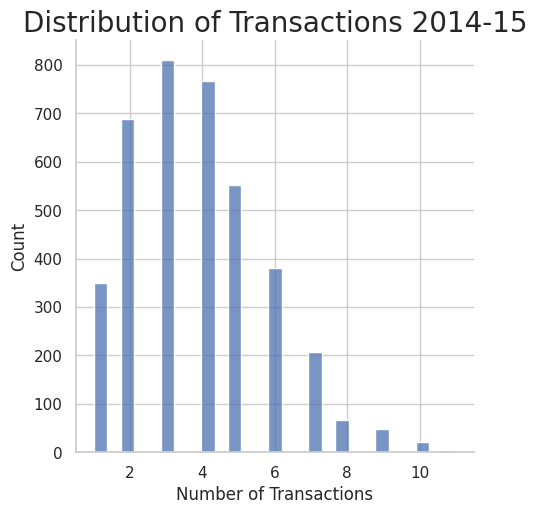

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(style = 'whitegrid')
sns.displot(df_fact5['Transactions'])
plt.title('Distribution of Transactions 2014-15', fontsize = 20)
plt.xlabel('Number of Transactions')
plt.ylabel('Count')


KeyError: ignored

In [ ]:
RFM1 = pd.read_sql( ''' WITH transaction_summary AS (
  SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(*) as frequency,
    SUM(LENGTH(itemDescription) - LENGTH(REPLACE(itemDescription, ',', '')) + 1) as monetary
  FROM
    data
  GROUP BY
    Member_number
),

recency AS (
  SELECT
    Member_number,
    CAST((julianday(date('now')) - julianday(most_recent_date)) AS INTEGER) as recency
  FROM
    transaction_summary
)

SELECT
  r.Member_number,
  r.recency,
  ts.frequency,
  ts.monetary
FROM
  recency r
JOIN
  transaction_summary ts
ON
  r.Member_number = ts.Member_number
ORDER BY
  r.Member_number ASC;

''', conn)

In [ ]:
RFM1.to_sql("RFM1", conn)

3898

In [ ]:
df_fact3 = pd.read_sql('SELECT * FROM RFM1', conn)
df_fact3

,index,Member_number,recency,frequency,monetary
0,0,1000,None,13,13
1,1,1001,None,12,12
2,2,1002,None,8,8
3,3,1003,None,8,8
4,4,1004,None,21,21
...,...,...,...,...,...
3893,3893,4996,None,10,10
3894,3894,4997,None,6,6
3895,3895,4998,None,2,2
3896,3896,4999,None,16,16


In [ ]:
transaction_summary.to_sql("TS1", conn)

NameError: ignored

In [ ]:
RFM2.to_sql("RFM2", conn)

3898

In [ ]:
RFM2 = pd.read_sql( ''' SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(*) as frequency,
    SUM(LENGTH(itemDescription) - LENGTH(REPLACE(itemDescription, ',', '')) + 1) as monetary
  FROM
    data
  GROUP BY
    Member_number
''', conn)

In [ ]:
RFM3 = pd.read_sql( ''' SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(DISTINCT Date) as frequency,
    COUNT(*) as total_items
  FROM
    data
  GROUP BY
    Member_number
''', conn)

In [ ]:
RFM3.to_sql("RFM3", conn)

3898

In [ ]:
df_fact4 = pd.read_sql('SELECT * FROM RFM2', conn)
df_fact4

,index,Member_number,most_recent_date,frequency,monetary
0,0,1000,27-05-2015,13,13
1,1,1001,20-01-2015,12,12
2,2,1002,30-08-2015,8,8
3,3,1003,27-02-2014,8,8
4,4,1004,19-08-2014,21,21
...,...,...,...,...,...
3893,3893,4996,24-11-2015,10,10
3894,3894,4997,27-12-2015,6,6
3895,3895,4998,14-10-2015,2,2
3896,3896,4999,26-12-2015,16,16


In [ ]:
df_fact5 = pd.read_sql('SELECT * FROM RFM3', conn)
df_fact5

,index,Member_number,most_recent_date,frequency,total_items
0,0,1000,27-05-2015,5,13
1,1,1001,20-01-2015,5,12
2,2,1002,30-08-2015,4,8
3,3,1003,27-02-2014,4,8
4,4,1004,19-08-2014,8,21
...,...,...,...,...,...
3893,3893,4996,24-11-2015,3,10
3894,3894,4997,27-12-2015,2,6
3895,3895,4998,14-10-2015,1,2
3896,3896,4999,26-12-2015,6,16


In [ ]:
RFM6 = pd.read_sql( ''' SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(DISTINCT Date) as frequency,
    COUNT(*) as monetary
  FROM
    data
  GROUP BY
    Member_number
''', conn)

In [ ]:
RFM6.to_sql("RFM6", conn)

3898

In [ ]:
df_fact6 = pd.read_sql('SELECT * FROM RFM6', conn)
df_fact6

,index,Member_number,most_recent_date,frequency,monetary
0,0,1000,27-05-2015,5,13
1,1,1001,20-01-2015,5,12
2,2,1002,30-08-2015,4,8
3,3,1003,27-02-2014,4,8
4,4,1004,19-08-2014,8,21
...,...,...,...,...,...
3893,3893,4996,24-11-2015,3,10
3894,3894,4997,27-12-2015,2,6
3895,3895,4998,14-10-2015,1,2
3896,3896,4999,26-12-2015,6,16


In [ ]:
RFM7 = pd.read_sql( ''' WITH transaction_summary AS (
  SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(DISTINCT Date) as frequency,
    COUNT(*) as monetary
  FROM
    data
  GROUP BY
    Member_number
),

recency AS (
  SELECT
    Member_number,
    CAST((julianday('2016-01-01') - julianday(most_recent_date)) AS INTEGER) as recency
  FROM
    transaction_summary
)

SELECT
  r.Member_number,
  r.recency,
  ts.frequency,
  ts.monetary
FROM
  recency r
JOIN
  transaction_summary ts
ON
  r.Member_number = ts.Member_number
ORDER BY
  r.Member_number ASC;
''', conn)

In [ ]:
RFM7.to_sql("RFM7", conn)

3898

In [ ]:
df_fact7 = pd.read_sql('SELECT * FROM RFM7', conn)
df_fact7

,index,Member_number,recency,frequency,monetary
0,0,1000,None,5,13
1,1,1001,None,5,12
2,2,1002,None,4,8
3,3,1003,None,4,8
4,4,1004,None,8,21
...,...,...,...,...,...
3893,3893,4996,None,3,10
3894,3894,4997,None,2,6
3895,3895,4998,None,1,2
3896,3896,4999,None,6,16


In [ ]:
RFM8 = pd.read_sql( ''' WITH transaction_summary AS (
  SELECT
    Member_number,
    MAX(Date) as most_recent_date,
    COUNT(DISTINCT Date) as frequency,
    COUNT(*) as monetary
  FROM
    data
  GROUP BY
    Member_number
),

recency AS (
  SELECT
    Member_number,
    CAST((julianday(substr('2016-01-01',1,4) || '-' || substr('2016-01-01',9,2) || '-' || substr('2016-01-01',6,2)) - 
          julianday(substr(most_recent_date,7,4) || '-' || substr(most_recent_date,4,2) || '-' || substr(most_recent_date,1,2))) AS INTEGER) as recency
  FROM
    transaction_summary
)

SELECT
  r.Member_number,
  r.recency,
  ts.frequency,
  ts.monetary
FROM
  recency r
JOIN
  transaction_summary ts
ON
  r.Member_number = ts.Member_number
ORDER BY
  r.Member_number ASC;

''', conn)

In [ ]:
RFM8.to_sql("RFM8", conn)

3898

In [ ]:
df_fact8 = pd.read_sql('SELECT Member_number, recency, frequency, monetary FROM RFM8', conn)
df_fact8

,Member_number,recency,frequency,monetary
0,1000,219,5,13
1,1001,346,5,12
2,1002,124,4,8
3,1003,673,4,8
4,1004,500,8,21
...,...,...,...,...
3893,4996,38,3,10
3894,4997,5,2,6
3895,4998,79,1,2
3896,4999,6,6,16


Text(0.5, 1.0, 'Histogram and Recency')

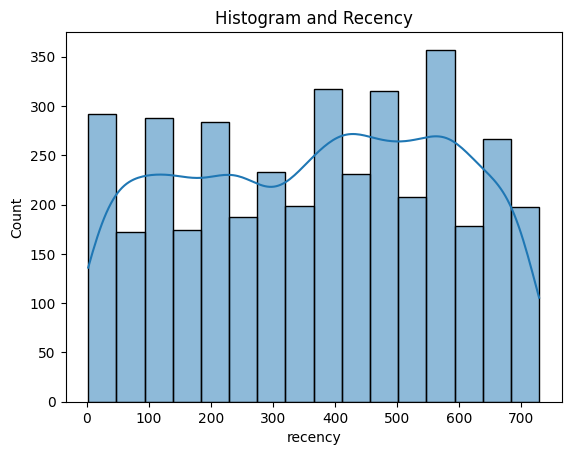

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM8, x='recency', kde=True)
ax.set_title('Histogram and Recency')


Text(0.5, 1.0, 'Histogram and Frequency')

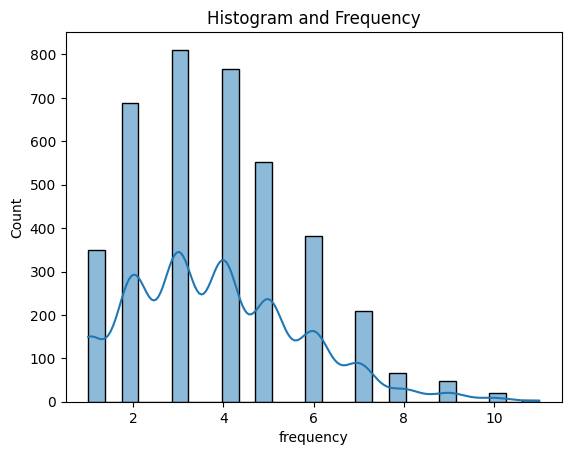

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM8, x='frequency', kde=True)
ax.set_title('Histogram and Frequency')


Text(0.5, 1.0, 'Histogram and MonetaryValue')

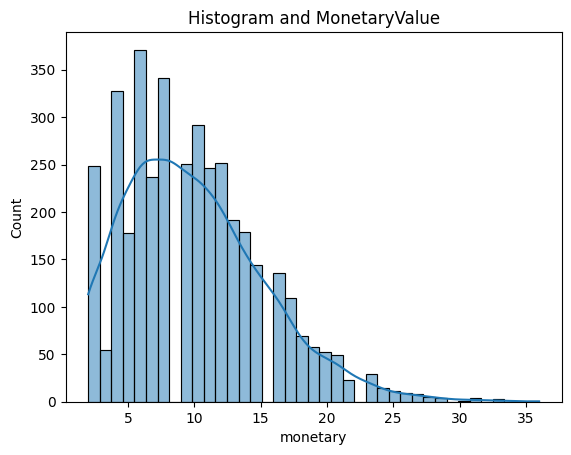

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=RFM8, x='monetary', kde=True)
ax.set_title('Histogram and MonetaryValue')


<ipython-input-59-424aefac3704>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM8['recency'])
<ipython-input-59-424aefac3704>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM8['frequency'])
<ipython-input-59-424aefac3704>:8: UserWarning: 

`dis

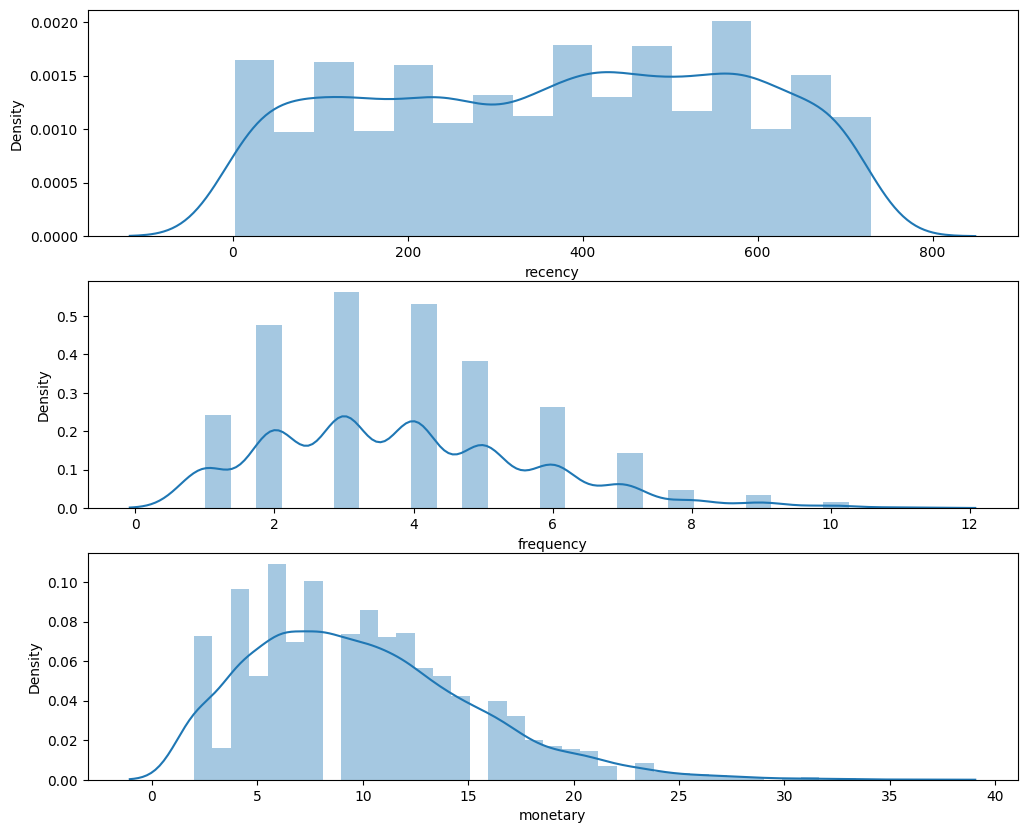

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM8['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM8['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM8['monetary'])
# Show the plot
plt.show()


In [ ]:
from scipy import stats
RFM8_fix = pd.DataFrame()
RFM8_fix["Recency"] = stats.boxcox(RFM8['recency'])[0]
RFM8_fix["Frequency"] = stats.boxcox(RFM8['frequency'])[0]
RFM8_fix["MonetaryValue"] = stats.boxcox(RFM8['monetary'])[0]
RFM8_fix.tail()


,Recency,Frequency,MonetaryValue
3893,18.843751,1.412097,3.847542
3894,3.110711,0.810273,2.654617
3895,33.485239,0.000000,0.802660
3896,3.758735,2.725071,5.191431
3897,117.695293,1.412097,2.988455


<ipython-input-62-ab101344619f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM8_fix['Recency'])
<ipython-input-62-ab101344619f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM8_fix['Frequency'])
<ipython-input-62-ab101344619f>:8: UserWarning

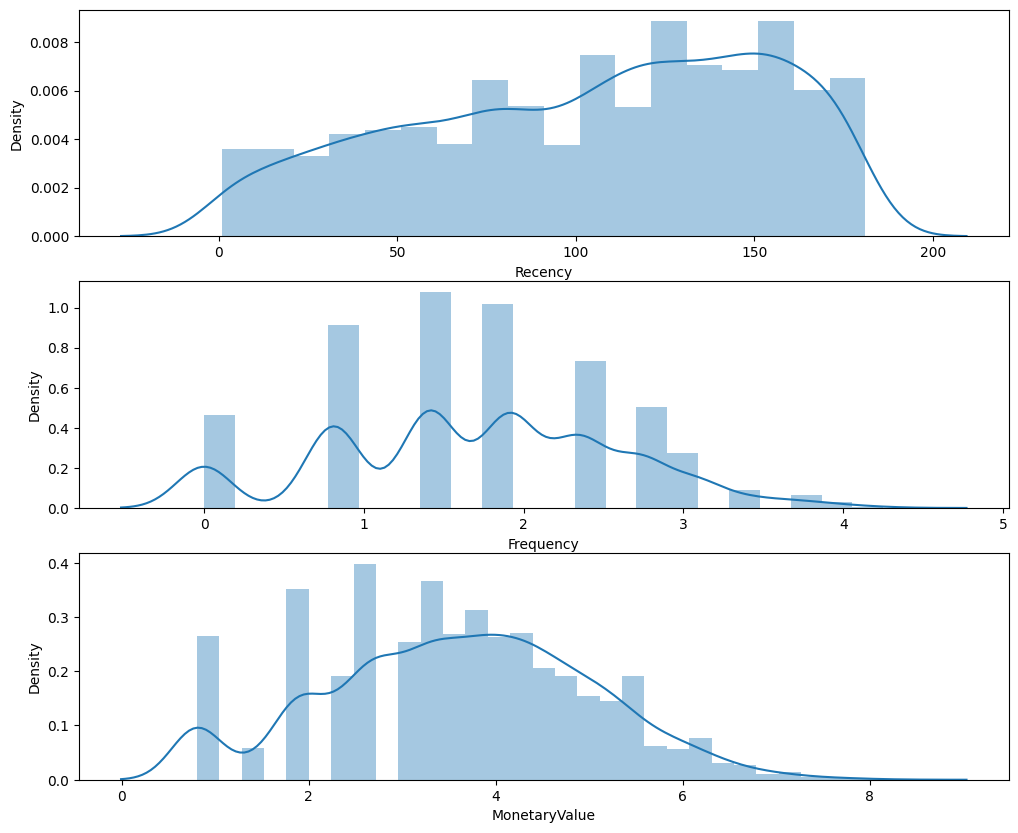

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM8_fix['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM8_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM8_fix['MonetaryValue'])
# Show the plot
plt.show()


In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(RFM8_fix)
customers_normalized = scaler.transform(RFM8_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]


[-0. -0. -0.]
[1. 1. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

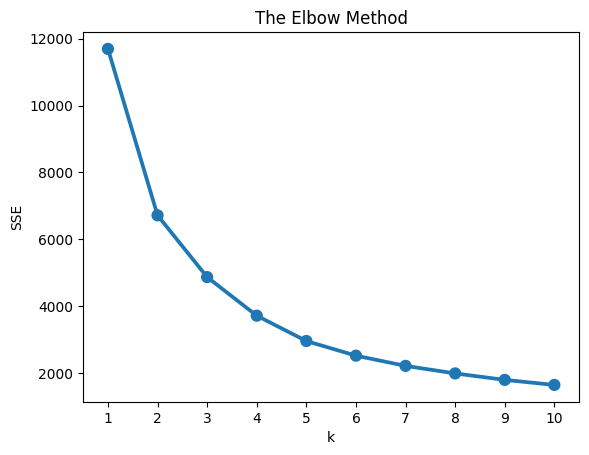

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

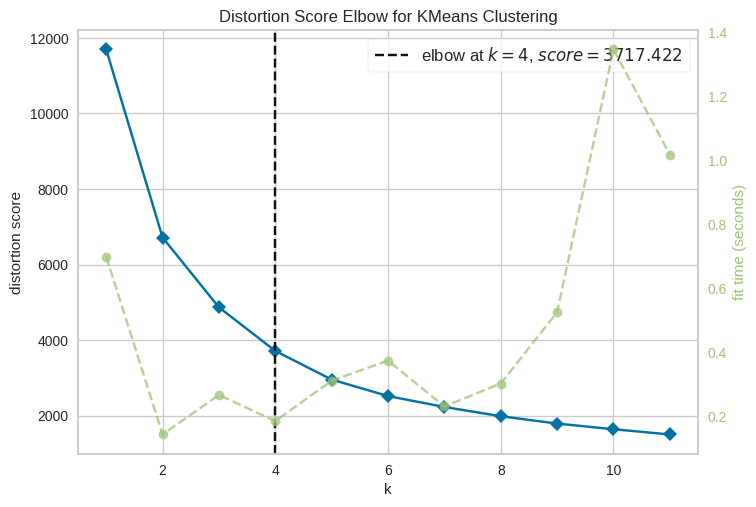

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)  
visualizer.show()  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Member_number,recency,frequency,monetary
Cluster,,,,
0,1218,1218,1218,1218
1,864,864,864,864
2,931,931,931,931
3,885,885,885,885


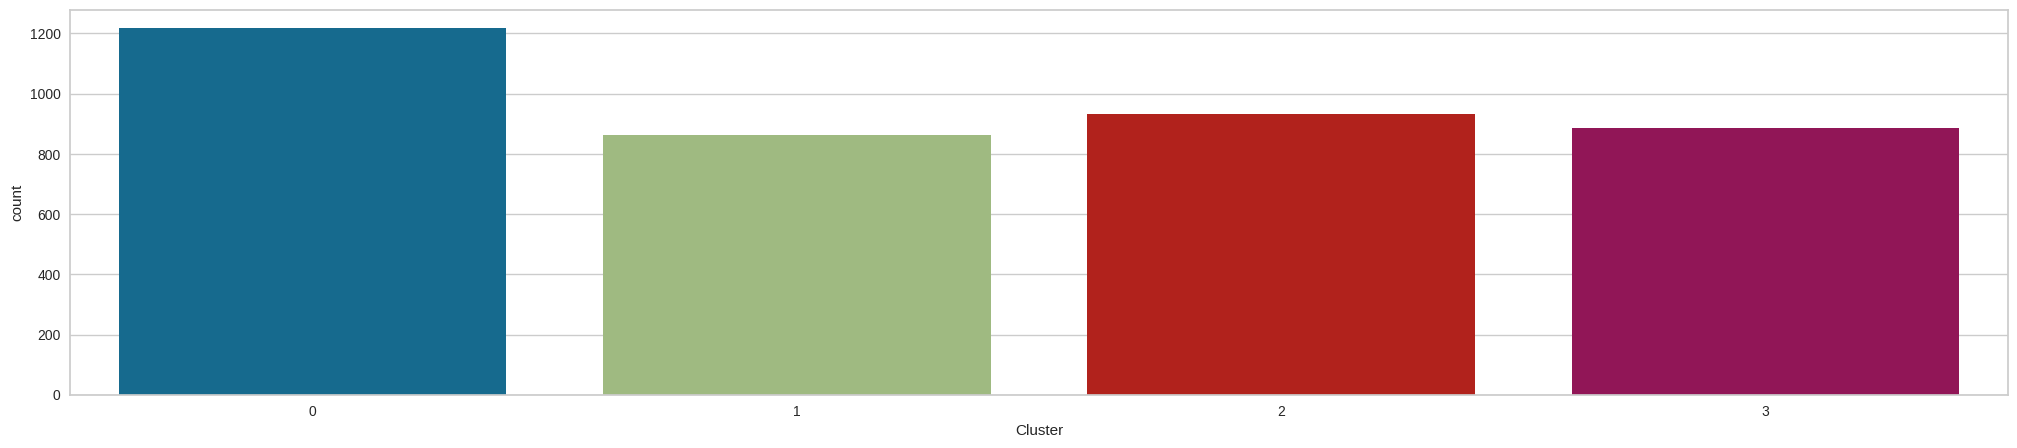

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape
RFM8["Cluster"] = model.labels_
RFM8.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=RFM8)
RFM8.groupby(['Cluster']).count()

In [ ]:
RFM8["Cluster"] = model.labels_
RFM8.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean', 'count']}).round(2)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0        525.25      3.76     9.32  1218
1        400.01      1.60     3.84   864
2        122.43      3.57     9.54   931
3        372.98      6.41    17.18   885

<Axes: xlabel='Attribute', ylabel='Value'>

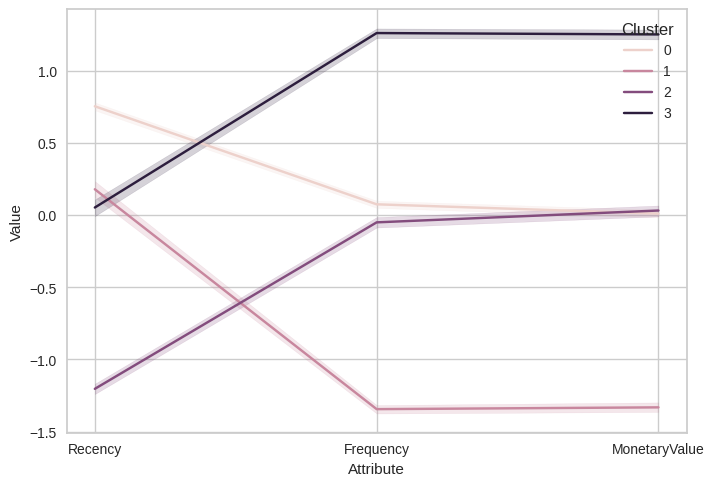

In [ ]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = RFM8.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
cleandata4.corr()


<ipython-input-13-f5dab67565ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleandata4.corr()


,index,Member_number
index,1.000000,0.001638
Member_number,0.001638,1.000000


In [ ]:
RFM8.corr()

,Member_number,recency,frequency,monetary
Member_number,1.000000,-0.017059,0.006844,0.001105
recency,-0.017059,1.000000,0.015935,-0.040501
frequency,0.006844,0.015935,1.000000,0.912489
monetary,0.001105,-0.040501,0.912489,1.000000
